# Logistic Regression

- regularisation combats overfitting by making model coeffs smaller.
- in scikit learn, hyperparameter 'C' is the inverse of the regularisation strength
- regularised loss = original loss + large coef penalty
    - adding regularisation modifies the loss function to penalise large coefficients, which distracts from goal of optimising accuracy 
    - so training accuracy goes down, but why does test accuracy go up?
    - regularisation makes the model 'fit less' (on a feature) which reduces overfitting


- Ridge - L2 
- Lasso - L1 (also performs feature selection)


In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Weak regularization (high C value)
weak_reg_model = LogisticRegression(C=1000, random_state=42)
weak_reg_model.fit(X_train, y_train)
weak_reg_predictions = weak_reg_model.predict(X_test)
weak_reg_accuracy = accuracy_score(y_test, weak_reg_predictions)

# Strong regularization (low C value)
strong_reg_model = LogisticRegression(C=0.01, random_state=42)
strong_reg_model.fit(X_train, y_train)
strong_reg_predictions = strong_reg_model.predict(X_test)
strong_reg_accuracy = accuracy_score(y_test, strong_reg_predictions)

print(f"Weak Regularization Accuracy: {weak_reg_accuracy}")
print(f"Strong Regularization Accuracy: {strong_reg_accuracy}")

Weak Regularization Accuracy: 0.8466666666666667
Strong Regularization Accuracy: 0.85


In the context of logistic regression, regularization helps to constrain or shrink the coefficient estimates towards zero. This can lead to simpler models that generalize better to new data.

There are two common types of regularization used in logistic regression:

1. **L1 Regularization (Lasso)**:
   - Adds a penalty equal to the absolute value of the magnitude of coefficients.
   - Can shrink some coefficients to exactly zero, effectively performing feature selection.
   - Useful when you expect only a few features to be important.

2. **L2 Regularization (Ridge)**:
   - Adds a penalty equal to the square of the magnitude of coefficients.
   - Tends to shrink coefficients evenly, but not to zero.
   - Useful when you expect most features to be relevant but want to avoid overfitting.

In `scikit-learn`, the `LogisticRegression` class uses L2 regularization by default. The strength of the regularization is controlled by the `C` parameter:
- **Weak Regularization (High C value)**:
  - A high value of `C` means less regularization.
  - The model is allowed to fit the training data more closely, which can lead to overfitting.
  - Example: `C=1000`

- **Strong Regularization (Low C value)**:
  - A low value of `C` means more regularization.
  - The model is constrained more, which can lead to underfitting if too strong.
  - Example: `C=0.01`

Here's a summary of the effects:
- **Weak Regularization**:
  - Model fits the training data closely.
  - Higher risk of overfitting.
  - May perform poorly on new, unseen data.

- **Strong Regularization**:
  - Model is more constrained.
  - Lower risk of overfitting.
  - May perform better on new, unseen data if regularization is appropriately tuned.

By adjusting the `C` parameter, you can find a balance between underfitting and overfitting, leading to a model that generalizes well to new data.

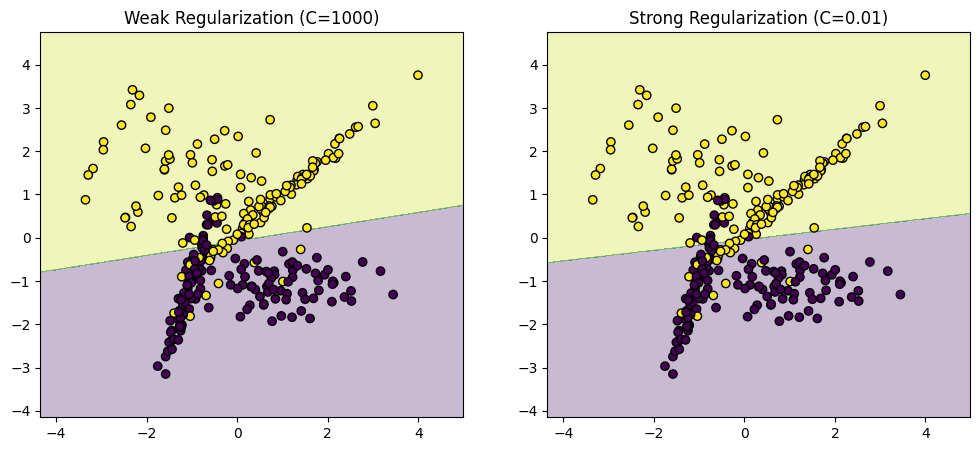

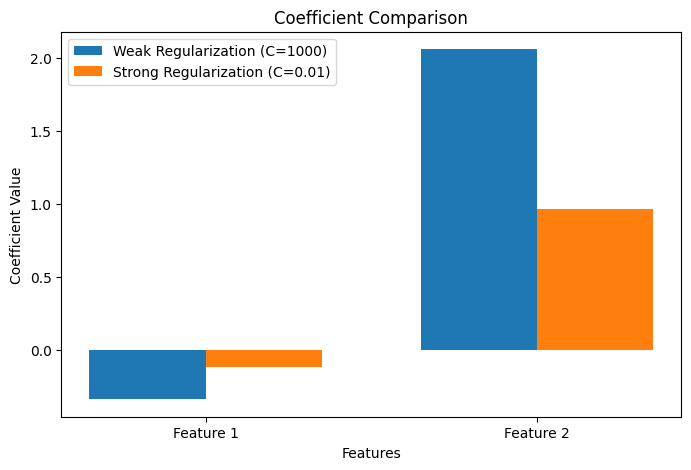

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Create a 2D dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression models
weak_reg_model = LogisticRegression(C=1000, random_state=42)
weak_reg_model.fit(X_train, y_train)

strong_reg_model = LogisticRegression(C=0.01, random_state=42)
strong_reg_model.fit(X_train, y_train)

# Plot decision boundaries
def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    ax.set_title(title)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_decision_boundary(weak_reg_model, X_test, y_test, axes[0], "Weak Regularization (C=1000)")
plot_decision_boundary(strong_reg_model, X_test, y_test, axes[1], "Strong Regularization (C=0.01)")
plt.show()

# Plot coefficients
coefficients = np.array([weak_reg_model.coef_[0], strong_reg_model.coef_[0]])
labels = ['Feature 1', 'Feature 2']

fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.35
index = np.arange(len(labels))

bar1 = ax.bar(index, coefficients[0], bar_width, label='Weak Regularization (C=1000)')
bar2 = ax.bar(index + bar_width, coefficients[1], bar_width, label='Strong Regularization (C=0.01)')

ax.set_xlabel('Features')
ax.set_ylabel('Coefficient Value')
ax.set_title('Coefficient Comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

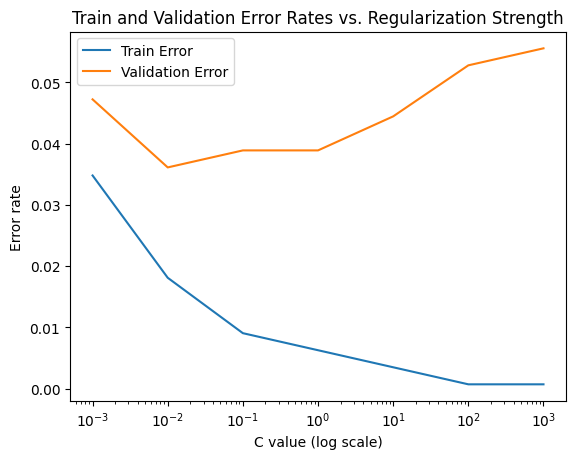

In [5]:
# over and underfitting - not good models

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and validation errors initialized as empty lists
train_errs = list()
valid_errs = list()

# Values of C to evaluate
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Loop over values of C_value
for C_value in C_values:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C=C_value, max_iter=1000, solver='liblinear')
    lr.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errs.append(1.0 - lr.score(X_train, y_train))
    valid_errs.append(1.0 - lr.score(X_valid, y_valid))
    
# Plot results
plt.semilogx(C_values, train_errs, label='Train Error')
plt.semilogx(C_values, valid_errs, label='Validation Error')
plt.xlabel('C value (log scale)')
plt.ylabel('Error rate')
plt.legend()
plt.title('Train and Validation Error Rates vs. Regularization Strength')
plt.show()

## Feature selection with L1

In [6]:
# Specify L1 regularization
from sklearn.model_selection import GridSearchCV


lr = LogisticRegression(solver='liblinear', penalty='l1')

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

Best CV params {'C': 0.1}
Total number of features: 640
Number of selected features: 250


Example of getting most 'postive' and 'negative' words using coefficients - on the newsgroups dataset.

In [7]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_20newsgroups

# Load the dataset
categories = ['rec.autos', 'rec.sport.baseball'] # categories
newsgroups = fetch_20newsgroups(subset='train', categories=categories)

# Create a CountVectorizer to convert text to a matrix of token counts
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Get the vocabulary
vocab = np.array(vectorizer.get_feature_names_out())

# Get the indices of the sorted coefficients
inds_ascending = np.argsort(lr.coef_.flatten())
inds_descending = inds_ascending[::-1]

# Print the most positive words
print("Most positive words (baseball): ", end="")
for i in range(5):
    print(vocab[inds_descending[i]], end=", ")
print("\n")

# Print the most negative words
print("Most negative words (autos): ", end="")
for i in range(5):
    print(vocab[inds_ascending[i]], end=", ")
print("\n")

Most positive words: baseball, game, scott, phillies, bob, 

Most negative words: car, cars, drive, interested, warning, 



## Logistic regression and probabilities

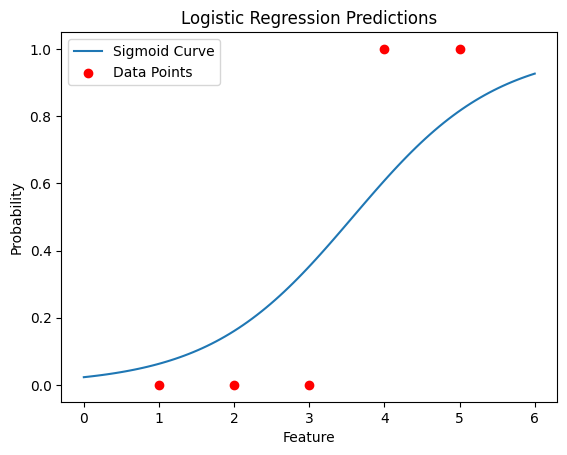

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Example data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([0, 0, 0, 1, 1])

# Fit logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Predict probabilities
X_test = np.linspace(0, 6, 100).reshape(-1, 1)
probabilities = model.predict_proba(X_test)[:, 1]

# Plot sigmoid curve
plt.plot(X_test, probabilities, label='Sigmoid Curve')
plt.scatter(X, y, color='red', label='Data Points')
plt.xlabel('Feature')
plt.ylabel('Probability')
plt.title('Logistic Regression Predictions')
plt.legend()
plt.show()

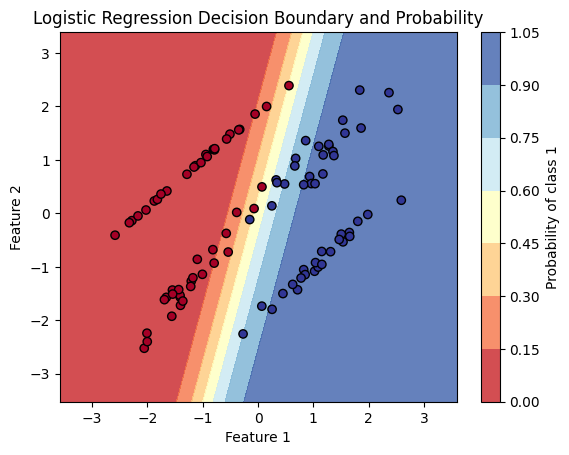

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate a synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Fit logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Create a mesh grid for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict probabilities for each point in the mesh grid
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Plot the decision boundary and probability
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.colorbar(label='Probability of class 1')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdYlBu)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary and Probability')
plt.show()

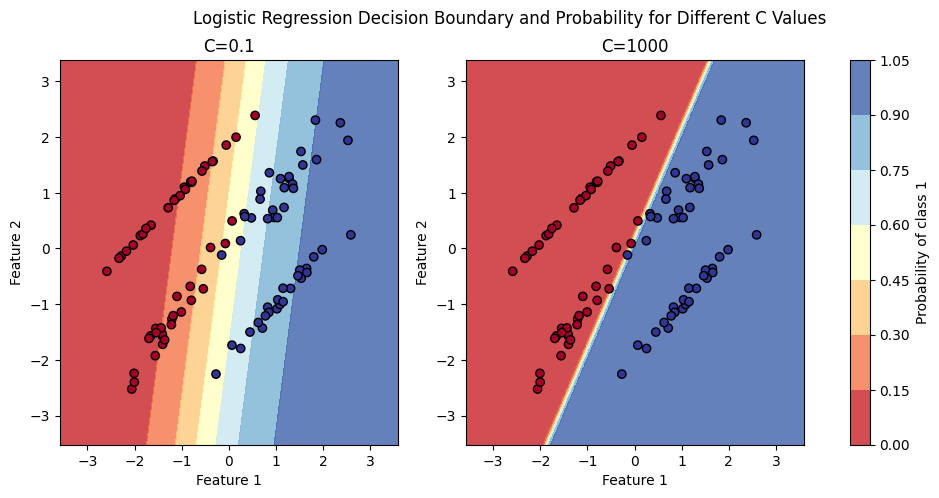

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate a synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Create a mesh grid for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Plot settings
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
C_values = [0.1, 1000]
titles = ['C=0.1', 'C=1000']

for ax, C, title in zip(axes, C_values, titles):
    # Fit logistic regression model with different C values
    model = LogisticRegression(C=C)
    model.fit(X, y)
    
    # Predict probabilities for each point in the mesh grid
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary and probability
    contour = ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdYlBu)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title(title)

# Add color bar
fig.colorbar(contour, ax=axes, orientation='vertical', label='Probability of class 1')
plt.suptitle('Logistic Regression Decision Boundary and Probability for Different C Values')
plt.show()

## Multi-class logistic regression

### Combining binary classifiers with one vs rest


In [11]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

# Load the wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the base classifier
base_classifier = LogisticRegression()

# Initialize the One-vs-Rest classifier
ovr_classifier = OneVsRestClassifier(base_classifier)

# Train the classifier
ovr_classifier.fit(X_train, y_train)

# Make predictions
y_pred = ovr_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Example of making a single prediction
sample = X_test[0].reshape(1, -1)
predicted_class = ovr_classifier.predict(sample)
print(f'Predicted class for the sample: {predicted_class[0]}')

Accuracy: 0.98
Predicted class for the sample: 0


One-vs-rest:

* fit binary classifier for each class
* predict with all, take largest output
* pro: simple, modular
* con: not directly optimising accuracy
* common for SVMs as well
* can produce probabilities

Multinomial/Softmax: 

* fit single classifier for all classes
* prediction directly outputs best class
* con: more complicated, new code
* pro: tackles problem directly
* possible for SVMs, but less common
* can produce probabilities

In [13]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the multinomial logistic regression classifier
classifier = LogisticRegression(solver='lbfgs', max_iter=200)

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Example of making a single prediction
sample = X_test[0].reshape(1, -1)
predicted_class = classifier.predict(sample)
print(f'Predicted class for the sample: {predicted_class[0]}')

Accuracy: 0.98
Predicted class for the sample: 0


In [16]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

# Load the wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# One-vs-Rest approach
ovr_classifier = OneVsRestClassifier(LogisticRegression())
ovr_classifier.fit(X_train, y_train)
train_accuracy_ovr = ovr_classifier.score(X_train, y_train) 
y_pred_ovr = ovr_classifier.predict(X_test)
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)
print(f'One-vs-Rest Training Accuracy: {train_accuracy_ovr:.2f}')
print(f'One-vs-Rest Accuracy: {accuracy_ovr:.2f}')
print('One-vs-Rest Coefficients:')
for i, estimator in enumerate(ovr_classifier.estimators_):
	print(f'Class {i} coefficients: {estimator.coef_}')

# Multinomial logistic regression approach
multinomial_classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
multinomial_classifier.fit(X_train, y_train)
train_accuracy_multinomial = multinomial_classifier.score(X_train, y_train)
y_pred_multinomial = multinomial_classifier.predict(X_test)
accuracy_multinomial = accuracy_score(y_test, y_pred_multinomial)
print(f'Multinomial Logistic Regression Training Accuracy: {train_accuracy_multinomial:.2f}')
print(f'Multinomial Logistic Regression Accuracy: {accuracy_multinomial:.2f}')
print('Multinomial Logistic Regression Coefficients:')
print(multinomial_classifier.coef_)

One-vs-Rest Training Accuracy: 1.00
One-vs-Rest Accuracy: 0.98
One-vs-Rest Coefficients:
Class 0 coefficients: [[ 1.31760115  0.23291462  0.93610118 -1.50045499  0.08106332  0.49055393
   0.84670019 -0.06363229 -0.07406845  0.04011452 -0.01104588  0.88924164
   1.57854063]]
Class 1 coefficients: [[-1.59640363 -0.45700047 -1.16779415  0.9882804  -0.21682218 -0.27146416
   0.45420302  0.20130187  0.44357534 -1.5413622   1.05774747  0.22474975
  -1.58637318]]
Class 2 coefficients: [[ 0.43631341  0.39906176  0.55827619  0.16889266  0.173909   -0.287156
  -1.29545962  0.00445591 -0.86282856  1.01438587 -1.18676201 -1.11444314
   0.04227682]]
Multinomial Logistic Regression Training Accuracy: 1.00
Multinomial Logistic Regression Accuracy: 0.98
Multinomial Logistic Regression Coefficients:
[[ 0.78209423  0.11320264  0.47667047 -0.82917249  0.04430198  0.36653206
   0.52796528 -0.05328137  0.18669528  0.16695553  0.07097016  0.59521152
   0.90276855]
 [-1.0360435  -0.30538811 -0.83676526  0.71

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [17]:
import matplotlib.pyplot as plt
import numpy as np

def plot_classifier(X, y, clf, ax=None, cmap='rainbow'):
    if ax is None:
        ax = plt.gca()
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = np.meshgrid(np.linspace(X0.min(), X0.max(), 100),
                         np.linspace(X1.min(), X1.max(), 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    ax.scatter(X0, X1, c=y, s=20, edgecolor='k', cmap=cmap)
    ax.set_xlim(X0.min(), X0.max())
    ax.set_ylim(X1.min(), X1.max())
    plt.show()

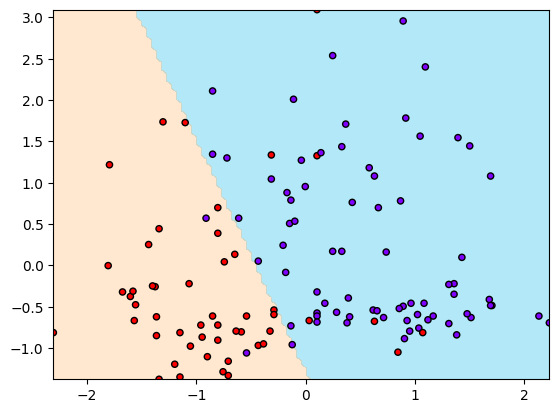

Predictions for class 1 vs. rest: [False False False False  True False  True False  True False False False
 False False False  True  True  True False  True False False  True False
 False False  True  True  True False False  True False False False False
 False False  True False False  True  True False False False  True False
  True False False False False False]


In [18]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Load the wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# For visualization purposes, we'll use only the first two features
X = X[:, :2]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the binary classifier (class 1 vs. rest)
svm_class_1 = SVC(kernel='linear')
svm_class_1.fit(X_train, y_train == 1)

# Plot the classifier
plot_classifier(X_train, y_train == 1, svm_class_1)

# Make predictions for class 1 vs. other classes
y_pred_class_1 = svm_class_1.predict(X_test)
print(f'Predictions for class 1 vs. rest: {y_pred_class_1}')

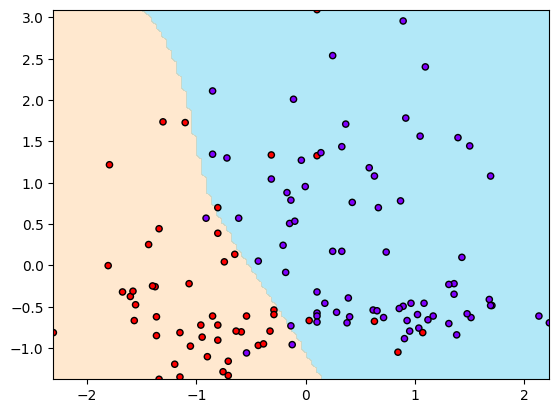

Predictions for class 1 vs. rest: [False False False False  True False  True False  True False False False
 False False False False  True  True False  True False False  True False
 False False  True  True  True False False  True False False False False
 False False  True False False  True  True False False False  True False
  True False  True False False False]


In [19]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt

def plot_classifier(X, y, clf, ax=None, cmap='rainbow'):
    if ax is None:
        ax = plt.gca()
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = np.meshgrid(np.linspace(X0.min(), X0.max(), 100),
                         np.linspace(X1.min(), X1.max(), 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    ax.scatter(X0, X1, c=y, s=20, edgecolor='k', cmap=cmap)
    ax.set_xlim(X0.min(), X0.max())
    ax.set_ylim(X1.min(), X1.max())
    plt.show()

# Load the wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# For visualization purposes, we'll use only the first two features
X = X[:, :2]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the binary classifier (class 1 vs. rest) with RBF kernel
svm_class_1 = SVC(kernel='rbf', gamma='auto')
svm_class_1.fit(X_train, y_train == 1)

# Plot the classifier
plot_classifier(X_train, y_train == 1, svm_class_1)

# Make predictions for class 1 vs. other classes
y_pred_class_1 = svm_class_1.predict(X_test)
print(f'Predictions for class 1 vs. rest: {y_pred_class_1}')